### Wstęp do Uczenia Maszynowego 
##### Laboratorium 11

In [34]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# puste listy, po każdym modelu będziemy zbierać wyniki, aby na koniec mieć tabelkę z podsumowaniem
modele = []
acc_train = []
acc_test = []

### Bagging - *bootstrap aggregation*

<img src="bagging.webp"  width="500"/>


*https://ai.plainenglish.io/boosting-performance-a-comprehensive-guide-to-bagging-ensemble-models-f890f7ad20cc*

### Zadanie 1
Przyjrzyjmy się danych dotyczących raka piersi, zbiór danych to odpowiednio `X.csv` oraz `y.csv`. Zbuduj komitet składający się z 50 modeli `knn`. W tym celu wykorzystaj funkcję `BaggingClassifier()`.

Dokonaj optymalizacji parametru $k$ (liczba sąsiadów) dla modeli `knn`.


Pamiętaj o skalowaniu danych oraz sprawdzeniu czy są braki danych! Jeżeli są, spróbuj zastosować `KNNImputer()` z liczbą sąsiadów równą 3.

*Więcej o zbiorze danych: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original*

In [36]:
# wczytanie danych
y = pd.read_csv("y.csv")
X = pd.read_csv("X.csv")

In [37]:
# podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
# pipeline 
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)), # imputacja braków danych modelem kNN
    ('scaler', StandardScaler()), # skalowanie zmiennych
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), # bagging z użyciem 50 modeli kNN
                                  n_estimators = 50))
])

In [39]:
# trenowanie modelu
pipeline.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('bagging',
                 BaggingClassifier(estimator=KNeighborsClassifier(),
                                   n_estimators=50))])

In [40]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("BaggingClassifier50KNN")
acc_train.append(pipeline.score(X_train, y_train.Class))
acc_test.append(pipeline.score(X_test, y_test.Class))

In [41]:
# pipeline i optymalizacja hiperparametru n_neighbors dla modelu kNN
pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), 
                                  n_estimators = 50))
])

# siatka parametrów
params = {
    'bagging__estimator__n_neighbors': [3, 4, 5, 6, 7]
    }

# definicja GridSearch
grid_pipeline = GridSearchCV(pipeline,
                             cv = 6,
                             param_grid = params)

In [42]:
# trenowanie modelu z optymalizacją hiperparametru n_neighbors
grid_pipeline.fit(X_train, y_train.Class)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('bagging',
                                        BaggingClassifier(estimator=KNeighborsClassifier(),
                                                          n_estimators=50))]),
             param_grid={'bagging__estimator__n_neighbors': [3, 4, 5, 6, 7]})

In [43]:
# najlepsze hiperparametry
grid_pipeline.best_params_

{'bagging__estimator__n_neighbors': 7}

In [44]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("BaggingClassifier50KNNGridSearch")
acc_train.append(grid_pipeline.score(X_train, y_train.Class))
acc_test.append(grid_pipeline.score(X_test, y_test.Class))

### Random forest (model lasu losowego)

<img src="rf.webp"  width="500"/>

*https://medium.com/@roiyeho/random-forests-98892261dc49*

### Zadanie 2
----
Przygotuj model lasu losowego i porównaj wyniki z modelem z Zadania 1. 

In [45]:
# na bazie poprzedniego pipeline zmieniamy model na las losowy (RandomForestClassifier)
pipeline_rf = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
#trenowanie modelu
pipeline_rf.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('rf', RandomForestClassifier())])

In [46]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("RandomForest")
acc_train.append(pipeline_rf.score(X_train, y_train.Class))
acc_test.append(pipeline_rf.score(X_test, y_test.Class))

### Zadanie 3
----
Przeprowadź eksperyment rozważając wartości parametru `n_estimators` od 50 do 500 co 25 dla modelu lasu losowego. Narysuj wykres, który na osi x będzie przyjmował kolejne liczby drzew w modelu, a na osi y dokładność otrzymanego modelu.

In [47]:
# siatka hiperparametrów, liczba drzew od 50 do 500 co 25
params_rf = {
    'rf__n_estimators': np.arange(50, 500, 25)
    }
# definicja GridSearch
grid_pipeline_rf = GridSearchCV(pipeline_rf,
                             cv = 3,
                             param_grid = params_rf)

In [48]:
# trenowanie modelu
grid_pipeline_rf.fit(X_train, y_train.Class)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                                       ('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])})

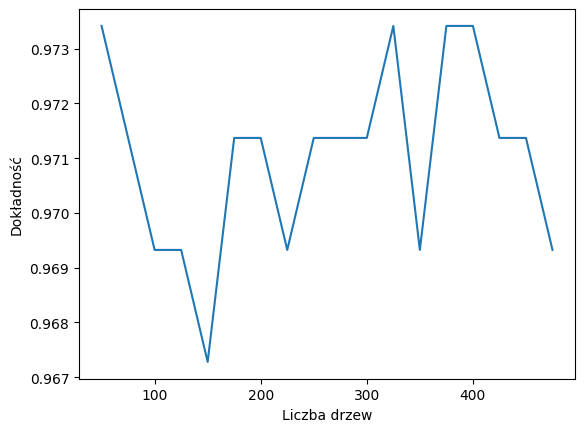

In [49]:
# wykres zależności liczby drzew od miary na zbiorze testowym
x = np.arange(50, 500, 25)
y = grid_pipeline_rf.cv_results_["mean_test_score"]

plt.plot(x, y)
plt.xlabel("Liczba drzew")
plt.ylabel("Dokładność")
plt.show()

### ExtraTrees


### Zadanie 4
----
Przygotuj model `ExtraTrees` dla danych z Zadania 1.

In [50]:
# na bazie poprzedniego pipeline zmieniamy model na extra trees (ExtraTreesClassifier)
pipeline_extra = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', ExtraTreesClassifier())
])

# trenowanie modelu
pipeline_extra.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()), ('rf', ExtraTreesClassifier())])

In [51]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("ExtraTrees")
acc_train.append(pipeline_extra.score(X_train, y_train.Class))
acc_test.append(pipeline_extra.score(X_test, y_test.Class))

### Boosting

<img src="boosting.webp"  width="500"/>

*https://medium.com/@brijesh_soni/understanding-boosting-in-machine-learning-a-comprehensive-guide-bdeaa1167a6*

### Zadanie 5
----
Przygotuj model `GradientBoostingClassifier` dla danych z Zadania 1.

In [52]:
# na bazie poprzedniego pipeline zmieniamy model na extra trees (GradientBoostingClassifier)
pipeline_gradientboosting = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('rf', GradientBoostingClassifier())
])

In [53]:
# trenowanie modelu
pipeline_gradientboosting.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('rf', GradientBoostingClassifier())])

In [54]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("GradientBoosting")
acc_train.append(pipeline_gradientboosting.score(X_train, y_train.Class))
acc_test.append(pipeline_gradientboosting.score(X_test, y_test.Class))

### Voting - komitety różnych modeli

### Zadanie 6
----
Przygotuj model wykorzystując funkcję `VotingClassifier()`. W tym celu wykorzystaj model regresji logistycznej, las losowy i k najbliższych sąsiadów.

In [55]:
# definicja modeli do Voting
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = KNeighborsClassifier()

# na bazie poprzedniego pipeline zmieniamy model na głosowanie (VotingClassifier)
pipeline_ensembels = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('eclf', VotingClassifier(estimators=[('lr', clf1),
                             ('rf', clf2),
                             ('knn', clf3)]))
])
# trenowanie modelu
pipeline_ensembels.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('eclf',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=50)),
                                              ('knn',
                                               KNeighborsClassifier())]))])

In [56]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("Voting")
acc_train.append(pipeline_ensembels.score(X_train, y_train.Class))
acc_test.append(pipeline_ensembels.score(X_test, y_test.Class))

In [57]:
# zebranie wyników do jednej tabelki
results = pd.DataFrame({'model' : modele,
                        'acc_train' : acc_train,
                        'acc_test' : acc_test})

In [58]:
results

,model,acc_train,acc_test
0,BaggingClassifier50KNN,0.977505,0.942857
1,BaggingClassifier50KNNGridSearch,0.973415,0.942857
2,RandomForest,1.000000,0.957143
3,ExtraTrees,1.000000,0.952381
4,GradientBoosting,1.000000,0.942857
5,Voting,0.983640,0.942857


<Axes: xlabel='acc_test', ylabel='model'>

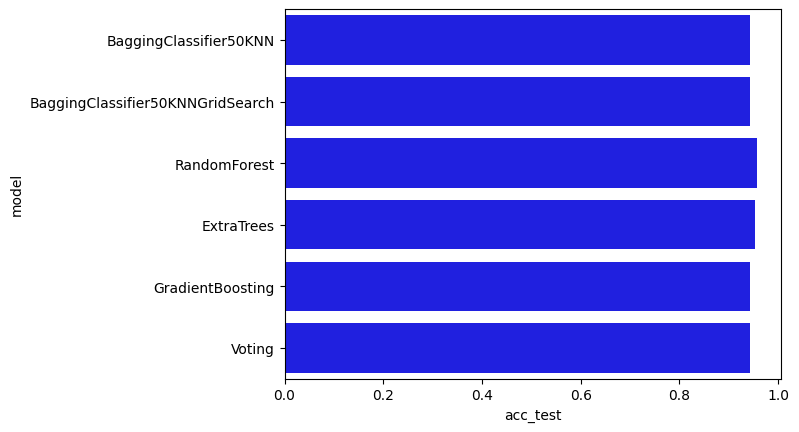

In [59]:
# wykres
sns.barplot(x = results.acc_test, y = results.model, color = "blue")

*Note* W przykładach modeli (bez GridSearchCV) wykorzystano podział zbioru na X_train i X_test, nie rozważano kroswalidacji! 

### * Stacking - komitety różnych modeli

In [60]:
from sklearn.ensemble import StackingClassifier

# definicja modeli do Stacking
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50)
clf3 = KNeighborsClassifier()

# na bazie poprzedniego pipeline zmieniamy model na głosowanie (VotingClassifier)
pipeline_stacking = Pipeline([
    ('imputer', KNNImputer(n_neighbors = 3)),
    ('scaler', StandardScaler()),
    ('eclf', StackingClassifier(estimators=[('lr', clf1),
                             ('rf', clf2),
                             ('knn', clf3)],
                             final_estimator=LogisticRegression()))
])
# trenowanie modelu
pipeline_stacking.fit(X_train, y_train.Class)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('scaler', StandardScaler()),
                ('eclf',
                 StackingClassifier(estimators=[('lr', LogisticRegression()),
                                                ('rf',
                                                 RandomForestClassifier(n_estimators=50)),
                                                ('knn',
                                                 KNeighborsClassifier())],
                                    final_estimator=LogisticRegression()))])

In [61]:
# dodawanie wyników do wcześniej stworzonych list
modele.append("Stacking")
acc_train.append(pipeline_stacking.score(X_train, y_train.Class))
acc_test.append(pipeline_stacking.score(X_test, y_test.Class))

In [62]:
# porównanie z poprzednimi wynikami
results = pd.DataFrame({'model' : modele,
                        'acc_train' : acc_train,
                        'acc_test' : acc_test})
results

,model,acc_train,acc_test
0,BaggingClassifier50KNN,0.977505,0.942857
1,BaggingClassifier50KNNGridSearch,0.973415,0.942857
2,RandomForest,1.000000,0.957143
3,ExtraTrees,1.000000,0.952381
4,GradientBoosting,1.000000,0.942857
5,Voting,0.983640,0.942857
6,Stacking,0.983640,0.942857
